# Interactive linear fit

QExPy provides an interactive interface to fit data to a linear model. This is aimed to give a pedagogic tool for students to understand how to define uncertainties in parameters of a model. It also provides a way to visualize how the correlation between parameters affects the uncertainty on quantities that depend on those parameters.

The interactive plot will first call the internal QExPy routines to perform a linear fit to the data and will initialize the parameters to their best estimates from the fit. The user is then provided with sliders to modify those values to observe the effect and to help understand how the automated fits work.

The interactive plot interface is slightly different depending on the plotting engine that is chosen (bokeh or matlplotlib). The matlpotlib interface is the most straightforward and the recommended one. The main difference with the bokeh interface is that the bokeh interface has to be called using 2 different cells, and the controls cannot be placed in the same cell as the plot.

<span style="color:red">With some versions of Jupyter, it is possible that the widgets for interacting with the plot do not display</span>, and you may see a warning that you need to enable widgets. If that is the case, you will need to open the Anaconda prompt (or a terminal), and type:

`jupyter nbextension enable --py --sys-prefix widgetsnbextension`

You will then need to **completely shut down Jupyter and restart it** for the change to take effect. You should only need to do this once. 

We start by importing the QExPy model and setting the plot engine:

In [1]:
import qexpy as q
q.plot_engine="mpl" # not strickly necessary, as the plot_engine is ignored

Loading BokehJS ...

We then create a Plot Object and call the interactive_linear_fit() function

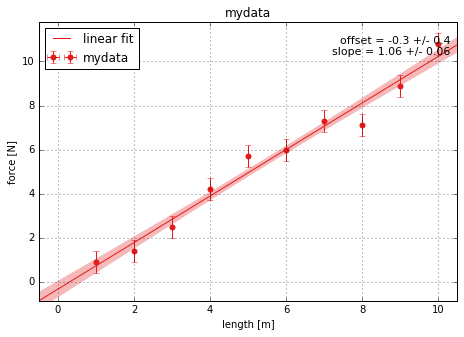

In [2]:
fig1 = q.MakePlot(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.9, 1.4, 2.5, 4.2, 5.7, 6., 7.3, 7.1, 8.9, 10.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'mydata')

#Depending on your browser, you may need to reposition the 
#text box with the fit parameters:
fig1.fit_results_x_offset=-50
fig1.fit_results_y_offset=-20
#fig1.dimensions_px = [800,600]

#We can specify the error_range parameter as the range over which
#the parameters can vary (as a fraction of their uncertainty)
fig1.interactive_linear_fit(error_range=10)

## Bokeh version
The Bokeh version is called a little differently; the main difference is that the interactive widgets need to be displayed in a different output cell. First, we display the fit, and then we interact with it. The interact part will actually interact only with the last Bokeh plot that was made; thus **if you that this in a notebook with additional plots below the interactive one, and you "Run All" cells, then the buttons will not work *** (This is why this is the last example in the notebook!)

In [3]:
q.plot_engine="bokeh" # not strickly necessary, as the plot_engine is ignored
#show the fit:
fig1.bk_show_linear_fit()

-----------------Fit results-------------------
Fit of  mydata  to  linear
Fit parameters:
mydata_linear_fit0_fitpars_intercept = -0.3 +/- 0.4,
mydata_linear_fit0_fitpars_slope = 1.06 +/- 0.06

Correlation matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 0.71/7
---------------End fit results----------------



In [4]:
#then we create the buttons to interact with it:
fig1.bk_interact_linear_fit(error_range=10)